In [1]:
import numpy as np
import operator
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import glob

import plotly
import plotly.plotly as py
import plotly.graph_objs as go

### load data
- plot the wordcloud
- top 30: max_words=30,

wrd_cnt_sort_2008


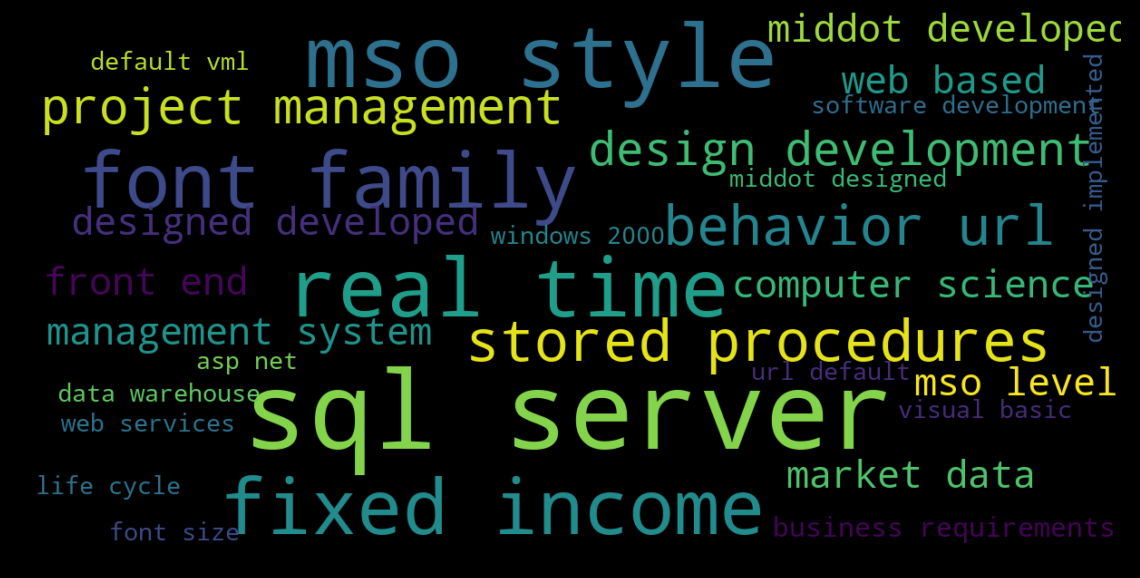

wrd_cnt_sort_2007


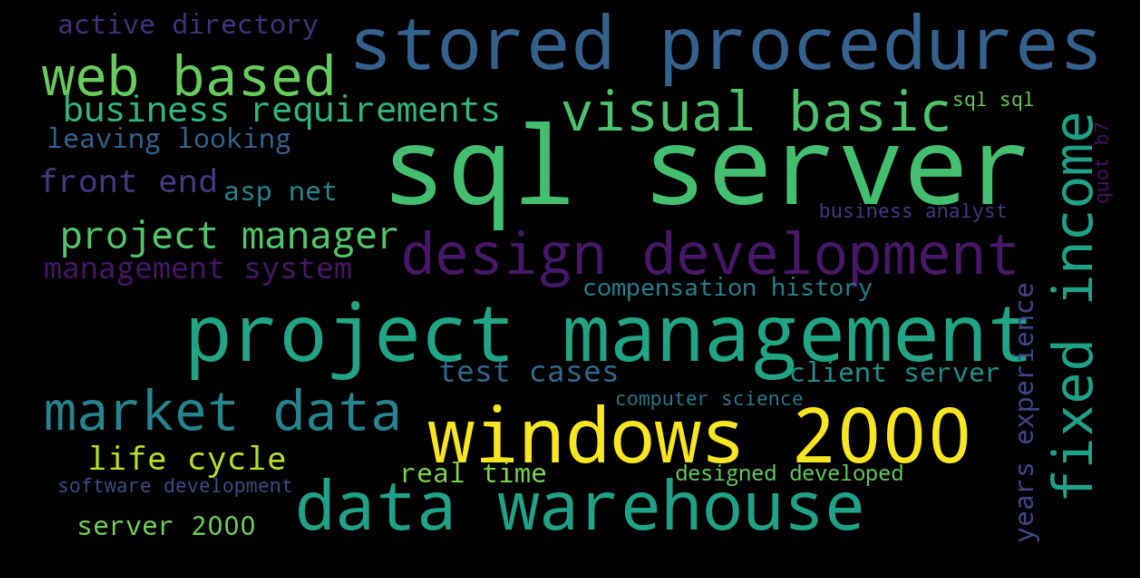

wrd_cnt_sort_2009


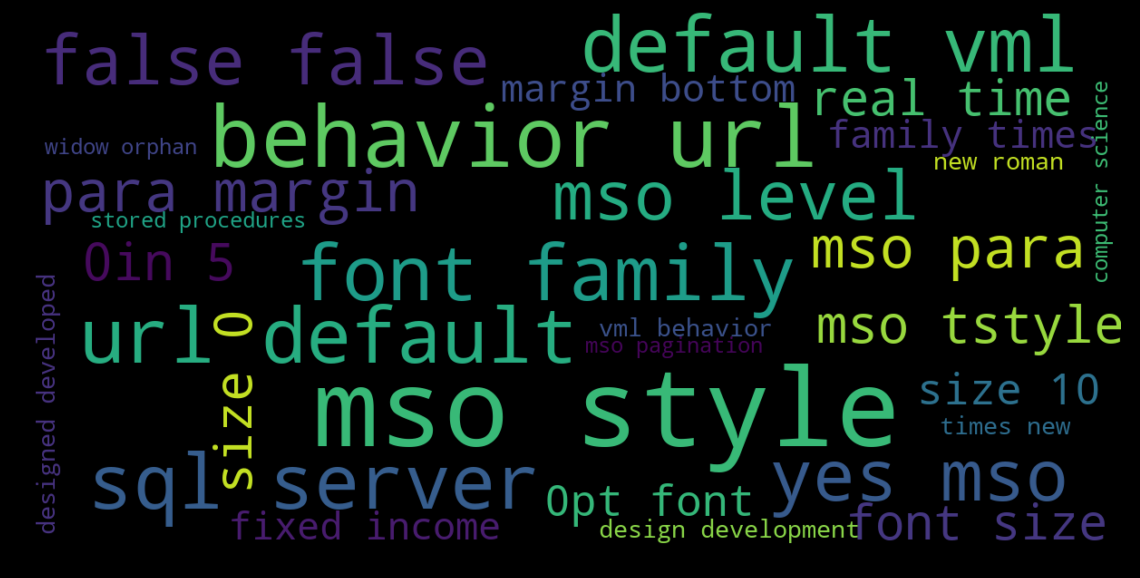

wrd_cnt_sort_2013


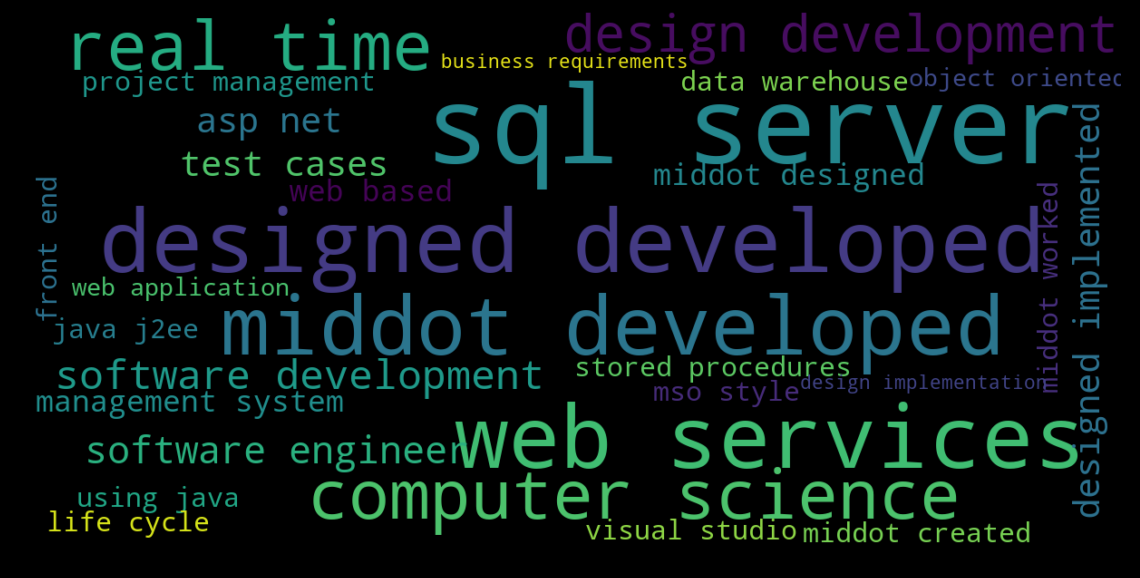

wrd_cnt_sort_2014


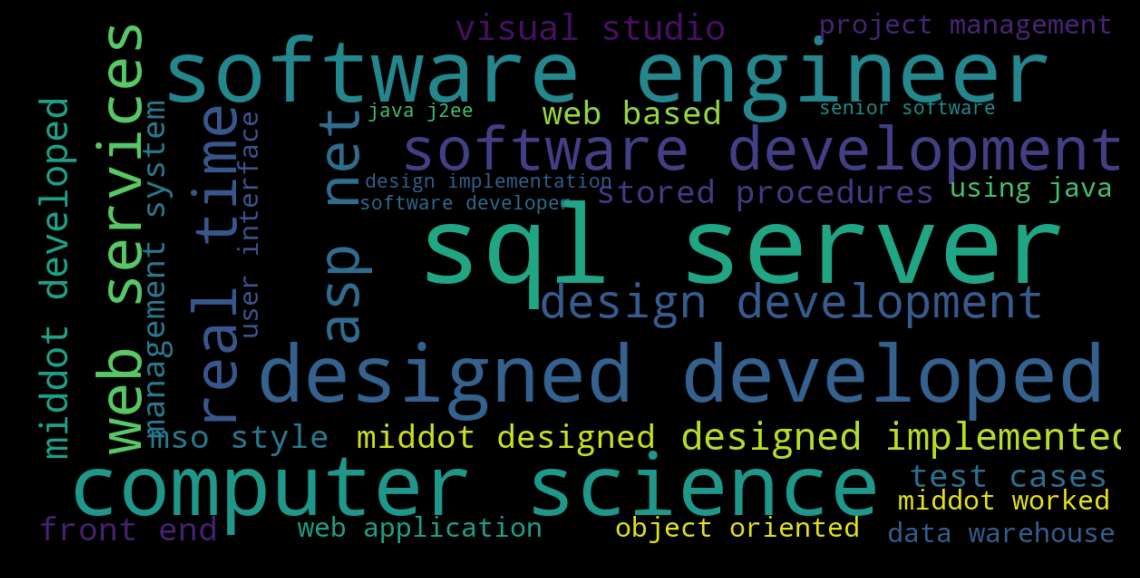

wrd_cnt_sort_2015


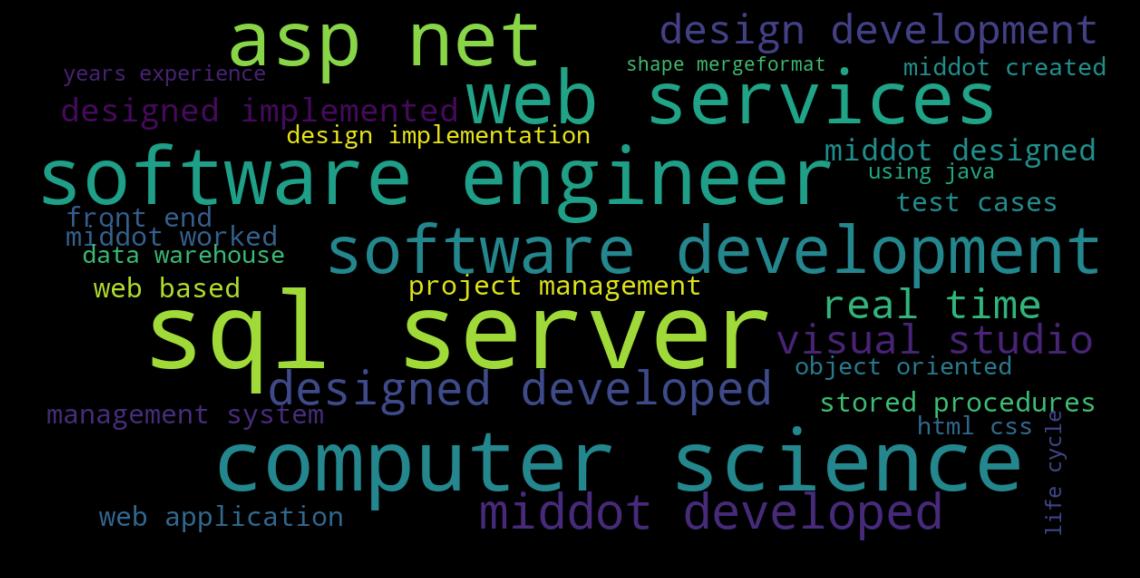

wrd_cnt_sort_2012


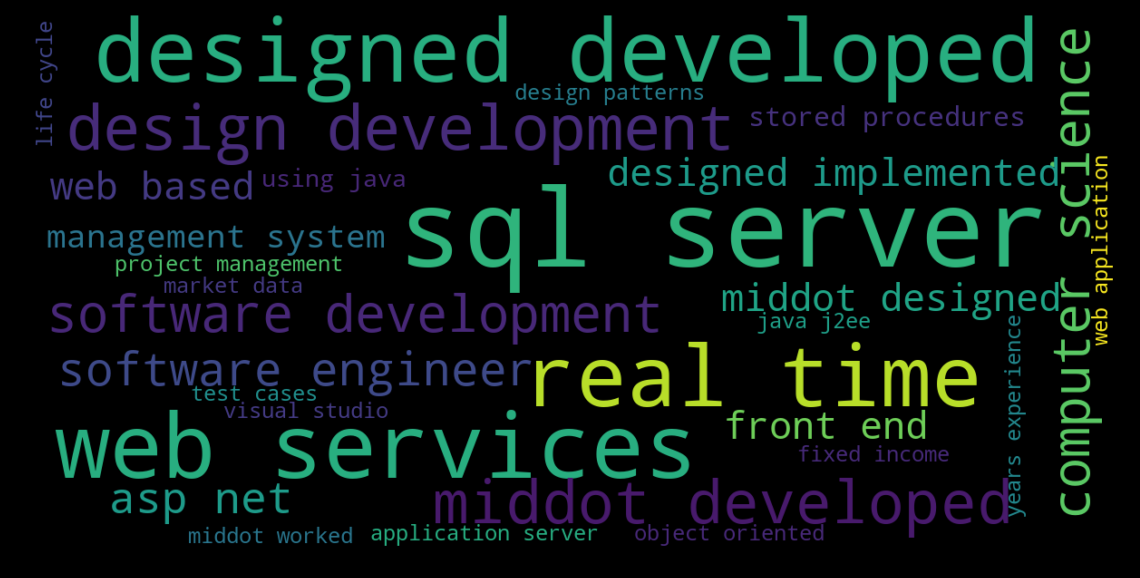

wrd_cnt_sort_2017


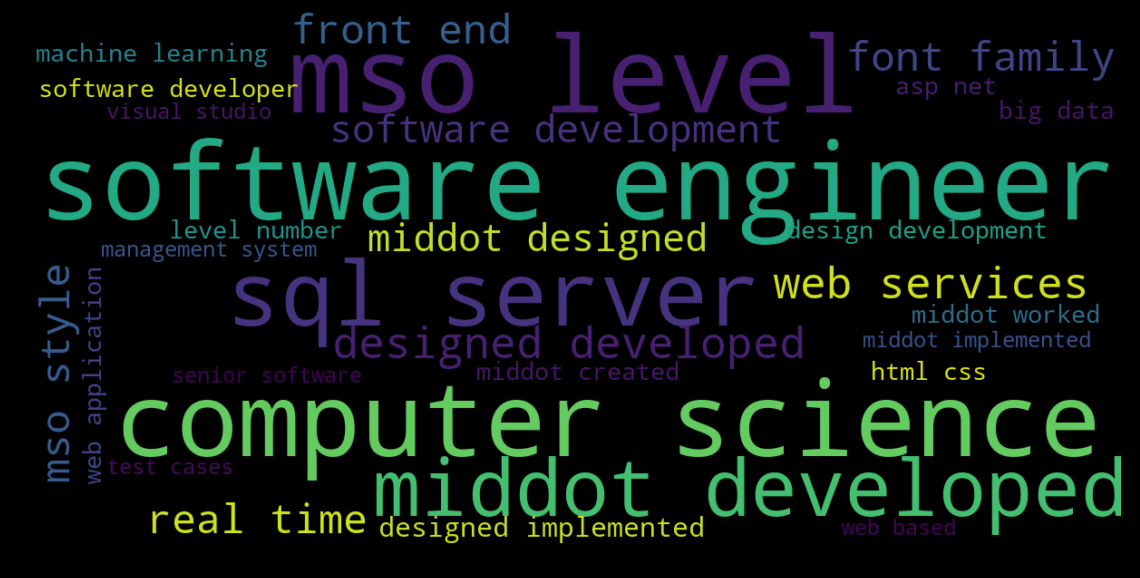

wrd_cnt_sort_2010


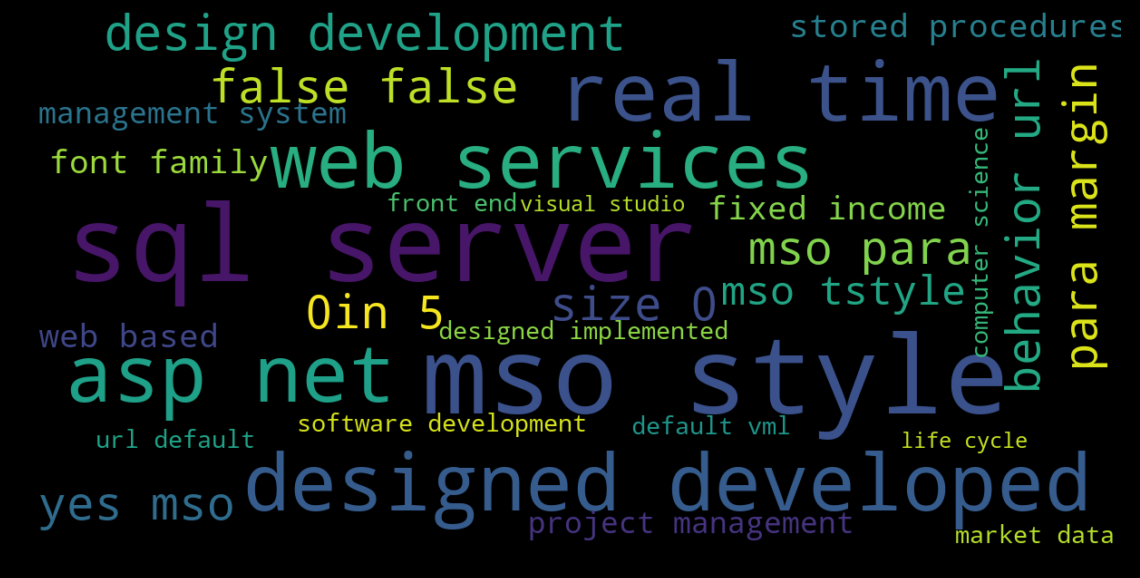

wrd_cnt_sort_2011


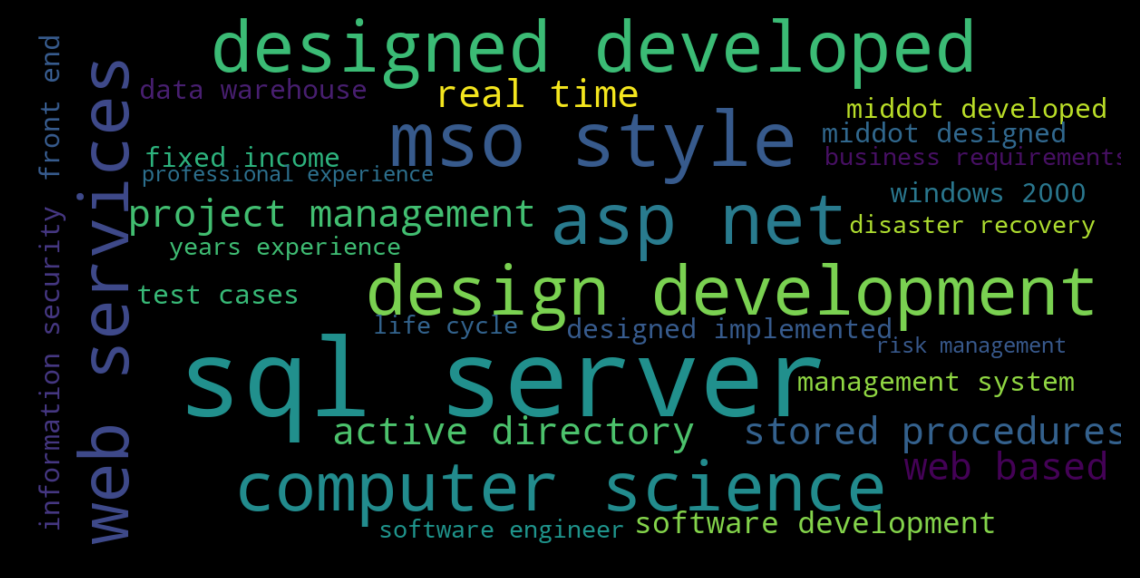

wrd_cnt_sort_2016


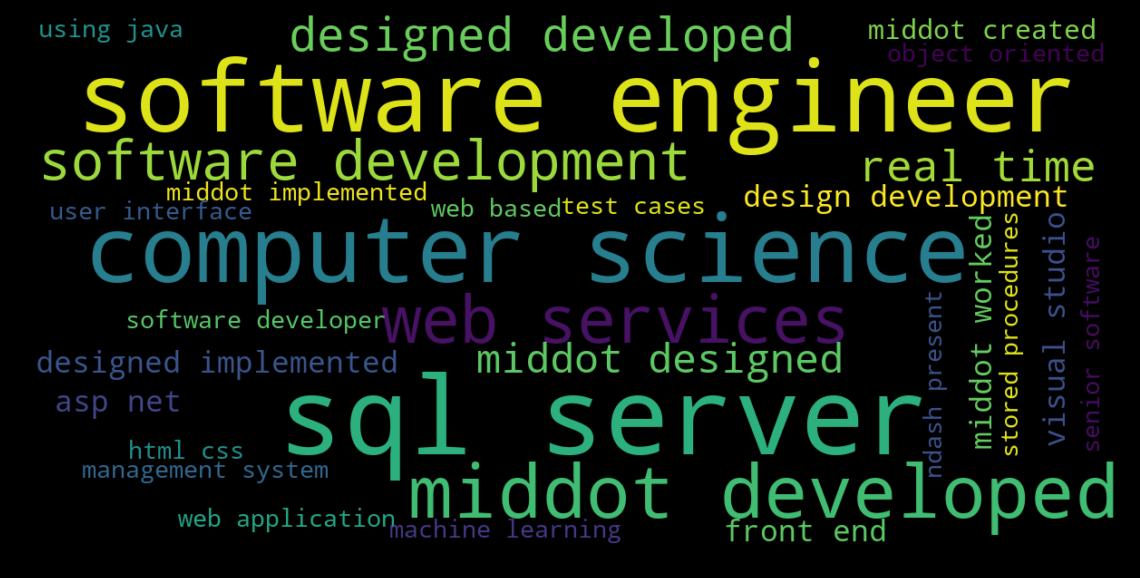

In [7]:
for filename in glob.glob("wrd_cnt_sort_*"):
    with open('{}/part-00000'.format(filename)) as f:
        lines = f.readlines()
    print(filename)
    line = [line.strip('\n') for line in lines]
    
    # feed dictionary to wordcloud
    wrd_cnt_dict = {array.strip("()").split(",")[0]: int(array.strip("()").split(",")[1]) for array in line}
   
    wordcloud = WordCloud(
                         max_words=30,
                         max_font_size=40,
                         scale=3,
                         ).generate_from_frequencies(wrd_cnt_dict)
    
    fig = plt.figure(figsize=(20,10),facecolor='k')
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    # lower max_font_size
    
    plt.savefig('./word_cloud/{}.png'.format(filename),facecolor='k', bbox_inches='tight')
    plt.show()
    plt.clf()

- make the set cross 10 years

In [9]:
# with open('{}/part-00000'.format('wrd_cnt_sort_2016')) as f:
#     lines = f.readlines()

In [2]:
top_10yr = []
for filename in glob.glob("wrd_cnt_sort_*"):
    with open('{}/part-00000'.format(filename)) as f:
        lines = f.readlines()
    print(filename)
    line = [line.strip('\n') for line in lines]
    
    # feed dictionary to wordcloud
    wrd_cnt_dict = {array.strip("()").split(",")[0]: int(array.strip("()").split(",")[1]) for array in line}
    top_dict = sorted(wrd_cnt_dict.items(), key=operator.itemgetter(1), reverse = True)
    top_set = {wrd_cnt[0] for wrd_cnt in top_dict}
    top_10yr.append(top_set)

    # update top_10yr
for i in top_10yr[1:]:
    top_10yr[0]&=i 

wrd_cnt_sort_2008
wrd_cnt_sort_2007
wrd_cnt_sort_2009
wrd_cnt_sort_2013
wrd_cnt_sort_2014
wrd_cnt_sort_2015
wrd_cnt_sort_2012
wrd_cnt_sort_2017
wrd_cnt_sort_2010
wrd_cnt_sort_2011
wrd_cnt_sort_2016


wrd_cnt_sort_2008
wrd_cnt_sort_2007
wrd_cnt_sort_2009
wrd_cnt_sort_2013
wrd_cnt_sort_2014
wrd_cnt_sort_2015
wrd_cnt_sort_2012
wrd_cnt_sort_2017
wrd_cnt_sort_2010
wrd_cnt_sort_2011
wrd_cnt_sort_2016


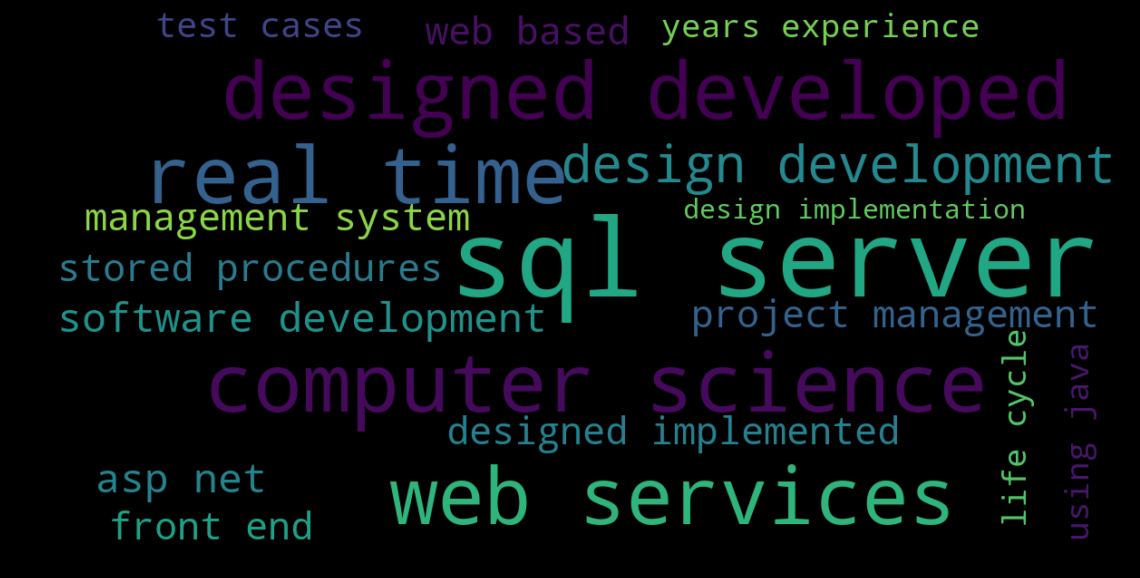

In [4]:
wrd_10yr_dict = {wrd:0 for wrd in top_10yr[0]}
for filename in glob.glob("wrd_cnt_sort_*"):
    with open('{}/part-00000'.format(filename)) as f:
        lines = f.readlines()
    print(filename)
    line = [line.strip('\n') for line in lines]
    
    wrd_cnt_dict = {array.strip("()").split(",")[0]: int(array.strip("()").split(",")[1]) for array in line}
    for i in wrd_10yr_dict.keys():
        wrd_10yr_dict[i] += wrd_cnt_dict[i]
wordcloud = WordCloud(
                     max_words=30,
                     max_font_size=40,
                     scale=3,
                     ).generate_from_frequencies(wrd_10yr_dict)

fig = plt.figure(figsize=(20,10),facecolor='k')
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# lower max_font_size

plt.savefig('./word_cloud/{}.png'.format('cross_10yr'),facecolor='k', bbox_inches='tight')
plt.show()
plt.clf()

In [21]:
wrd_10yr_dict

{'asp net': 15467,
 'computer science': 19063,
 'design development': 16227,
 'design implementation': 7556,
 'designed developed': 17734,
 'designed implemented': 13292,
 'front end': 12284,
 'life cycle': 8633,
 'management system': 11698,
 'project management': 11372,
 'real time': 17416,
 'software development': 16040,
 'sql server': 37157,
 'stored procedures': 12365,
 'test cases': 10421,
 'using java': 8476,
 'web based': 11409,
 'web services': 17647,
 'years experience': 8286}

### take the Buzz words over 10 years to see the trend 

In [6]:
sorted(wrd_10yr_dict.items(), key=operator.itemgetter(1), reverse = True)

[('sql server', 37157),
 ('computer science', 19063),
 ('designed developed', 17734),
 ('web services', 17647),
 ('real time', 17416),
 ('design development', 16227),
 ('software development', 16040),
 ('asp net', 15467),
 ('designed implemented', 13292),
 ('stored procedures', 12365),
 ('front end', 12284),
 ('management system', 11698),
 ('web based', 11409),
 ('project management', 11372),
 ('test cases', 10421),
 ('life cycle', 8633),
 ('using java', 8476),
 ('years experience', 8286),
 ('design implementation', 7556)]

In [7]:
buzzwrd_10yr = sorted(wrd_10yr_dict.items(), key=operator.itemgetter(1), reverse = True)

In [8]:
x_jb = [i[0] for i in buzzwrd_10yr]
y_cnt = [i[1] for i in buzzwrd_10yr]

In [12]:
trace0 = go.Bar(
    x=x_jb,
    y=y_cnt,
    name='Buzz Words',
)

data = [trace0]
layout = go.Layout(
    xaxis=dict(tickangle=-25,
                nticks = 10,
                tickmode='linear',
              ),
    yaxis = dict(
      title = "Count Numbers"
    ),
    barmode='group',
    title = 'Buzz Words 2007-2017',
    font = dict(size=12)
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename='./bar_chart/buzzwrdcross10years')

/Users/yupinglin/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `./bar_chart/buzzwrdcross10years` didn't end with .html. Adding .html to the end of your file.



'file:///Users/yupinglin/Google Drive/NYU-DS/2018_summer/Big Data Development/project/proposal and main script/script /main scrip/output data/bar_chart/buzzwrdcross10years.html'

### ### take the top 4 words over 10 years to see the trend 

In [13]:
years, sql_server, computer_science, designed_developed, web_services = [],[],[],[],[]
for filename in sorted(glob.glob("wrd_cnt_sort_*")):
    with open('{}/part-00000'.format(filename)) as f:
        lines = f.readlines()
    print(filename)
    line = [line.strip('\n') for line in lines]
    
    # feed dictionary to wordcloud
    wrd_cnt_dict = {array.strip("()").split(",")[0]: int(array.strip("()").split(",")[1]) for array in line}
    sql_server.append(wrd_cnt_dict['sql server'])
    computer_science.append(wrd_cnt_dict['computer science'])
    designed_developed.append(wrd_cnt_dict['designed developed'])
    web_services.append(wrd_cnt_dict['web services'])
    years.append(filename.split("_")[-1])

wrd_cnt_sort_2007
wrd_cnt_sort_2008
wrd_cnt_sort_2009
wrd_cnt_sort_2010
wrd_cnt_sort_2011
wrd_cnt_sort_2012
wrd_cnt_sort_2013
wrd_cnt_sort_2014
wrd_cnt_sort_2015
wrd_cnt_sort_2016
wrd_cnt_sort_2017


In [14]:
trace0 = go.Bar(
    x=years,
    y=sql_server,
    name='sql server',
)
trace1 = go.Bar(
    x=years,
    y=computer_science,
    name='computer science',
)
trace2 = go.Bar(
    x=years,
    y=designed_developed,
    name='designed developed',
)
trace3 = go.Bar(
    x=years,
    y=web_services,
    name='web services',
)

data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    xaxis=dict(tickangle=-45,
                nticks = 10,
                title = "Years",
                tickmode='linear',
              ),
    yaxis = dict(
      title = "Count Numbers"
    ),
    barmode='group',
    title = 'Top 4 Words 2007-2017',
    font = dict(size=16)
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename='./bar_chart/top4cross10years')

/Users/yupinglin/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `./bar_chart/top4cross10years` didn't end with .html. Adding .html to the end of your file.



'file:///Users/yupinglin/Google Drive/NYU-DS/2018_summer/Big Data Development/project/proposal and main script/script /main scrip/output data/bar_chart/top4cross10years.html'

### make the bar chart in each year (hot word distribution)
- top 20

In [15]:
for filename in sorted(glob.glob("wrd_cnt_sort_*")):
    with open('{}/part-00000'.format(filename)) as f:
        lines = f.readlines()
    print(filename)
    line = [line.strip('\n') for line in lines]
    year = filename.split("_")[-1]
    # feed dictionary to wordcloud
    wrd_cnt_dict = {array.strip("()").split(",")[0]: int(array.strip("()").split(",")[1]) for array in line}
    top30 = sorted(wrd_cnt_dict.items(), key=operator.itemgetter(1), reverse = True)[:20]
    wrd = [ " ".join(i[0].split(" ")) for i in top30]
    cnt = [i[1] for i in top30]
    
    trace0 = go.Bar(
    x=wrd,
    y=cnt,
    name='Top 30 Words {}'.format(year),
    
    )
    
    layout = go.Layout(
    xaxis=dict(tickangle=-30,
                tickfont=dict(
                size=12),
                tickmode='linear',
              ),
    yaxis = dict(
      title = "Count Numbers"
    ),
    barmode='group',
    title = 'Top 20 Words {}'.format(year),
    font = dict(size=16)
    ,  
    )
    
    

    
    data = [trace0]
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.plot(fig, filename='./bar_chart/top3_{}'.format(year))


wrd_cnt_sort_2007


/Users/yupinglin/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `./bar_chart/top3_2007` didn't end with .html. Adding .html to the end of your file.



wrd_cnt_sort_2008


/Users/yupinglin/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `./bar_chart/top3_2008` didn't end with .html. Adding .html to the end of your file.



wrd_cnt_sort_2009


/Users/yupinglin/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `./bar_chart/top3_2009` didn't end with .html. Adding .html to the end of your file.



wrd_cnt_sort_2010


/Users/yupinglin/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `./bar_chart/top3_2010` didn't end with .html. Adding .html to the end of your file.



wrd_cnt_sort_2011


/Users/yupinglin/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `./bar_chart/top3_2011` didn't end with .html. Adding .html to the end of your file.



wrd_cnt_sort_2012


/Users/yupinglin/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `./bar_chart/top3_2012` didn't end with .html. Adding .html to the end of your file.



wrd_cnt_sort_2013


/Users/yupinglin/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `./bar_chart/top3_2013` didn't end with .html. Adding .html to the end of your file.



wrd_cnt_sort_2014


/Users/yupinglin/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `./bar_chart/top3_2014` didn't end with .html. Adding .html to the end of your file.



wrd_cnt_sort_2015


/Users/yupinglin/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `./bar_chart/top3_2015` didn't end with .html. Adding .html to the end of your file.



wrd_cnt_sort_2016


/Users/yupinglin/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `./bar_chart/top3_2016` didn't end with .html. Adding .html to the end of your file.



wrd_cnt_sort_2017


/Users/yupinglin/anaconda/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `./bar_chart/top3_2017` didn't end with .html. Adding .html to the end of your file.



In [70]:
top30 = sorted(wrd_cnt_dict.items(), key=operator.itemgetter(1), reverse = True)[:30]

In [72]:
wrd = [i[0] for i in top30]
cnt = [i[1] for i in top30]

In [74]:
wrd

['software engineer',
 'mso level',
 'computer science',
 'sql server',
 'middot developed',
 'designed developed',
 'web services',
 'mso style',
 'front end',
 'real time',
 'font family',
 'software development',
 'middot designed',
 'designed implemented',
 'level number',
 'html css',
 'machine learning',
 'web application',
 'design development',
 'middot worked',
 'asp net',
 'big data',
 'software developer',
 'middot created',
 'management system',
 'senior software',
 'web based',
 'middot implemented',
 'visual studio',
 'test cases']

In [213]:
for i in line_list.keys():
    line_list[i.upper()] = line_list.pop(i)

In [214]:
line_list

{'ACTIVE DIRECTORY': 730,
 'ANALYSIS DESIGN': 506,
 'APPLICATION DEVELOPMENT': 446,
 'APPLICATION SERVER': 473,
 'ASP NET': 736,
 'BACK END': 500,
 'BUSINESS ANALYST': 631,
 'BUSINESS OBJECTS': 442,
 'BUSINESS PROCESS': 487,
 'BUSINESS REQUIREMENTS': 885,
 'CLIENT SERVER': 734,
 'COMMUNICATION SKILLS': 589,
 'COMPENSATION HISTORY': 691,
 'COMPUTER SCIENCE': 659,
 'CRYSTAL REPORTS': 564,
 'DATA MODELING': 477,
 'DATA WAREHOUSE': 1020,
 'DESIGN DEVELOPMENT': 1019,
 'DESIGNED DEVELOPED': 673,
 'DEVELOPMENT TEAM': 461,
 'DISASTER RECOVERY': 610,
 'END USERS': 493,
 'FINANCIAL SERVICES': 484,
 'FIXED INCOME': 931,
 'FONT FAMILY': 435,
 'FORLEAVING LOOKING': 435,
 'FRONT END': 884,
 'HARDWARE SOFTWARE': 525,
 'HTTP WWW': 479,
 'INTERVIEW STARTAVAILABILITY': 513,
 'JOB SEARCH': 466,
 'LEAVING LOOKING': 784,
 'LIFE CYCLE': 848,
 'LOTUS NOTES': 506,
 'MANAGEMENT SYSTEM': 823,
 'MARKET DATA': 949,
 'MERRILL LYNCH': 459,
 'MSO STYLE': 576,
 'NEW JERSEY': 471,
 'ORACLE 9I': 494,
 'ORACLE SQL': 420

In [82]:
wrd_cnt_dict = {array.strip("()").split(",")[0]: int(array.strip("()").split(",")[1]) for array in line}

In [215]:
wordcloud = WordCloud(background_color='white',
                         max_words=30,
                         max_font_size=40,
                         scale=3,
                         random_state=1).generate_from_frequencies(line_list)

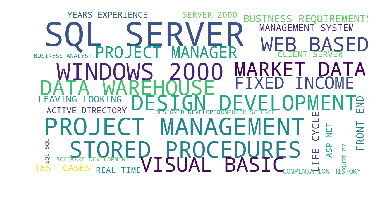

In [219]:
plt.imshow(wordcloud)
plt.axis("off")
# lower max_font_size
fig = plt.figure(1, figsize=(12, 12))
plt.savefig('./word_cloud/word_could_2007.png')


In [44]:
 sorted(glob.glob("wrd_cnt_sort_*"))

['wrd_cnt_sort_2007',
 'wrd_cnt_sort_2008',
 'wrd_cnt_sort_2009',
 'wrd_cnt_sort_2010',
 'wrd_cnt_sort_2011',
 'wrd_cnt_sort_2012',
 'wrd_cnt_sort_2013',
 'wrd_cnt_sort_2014',
 'wrd_cnt_sort_2015',
 'wrd_cnt_sort_2016',
 'wrd_cnt_sort_2017']

In [40]:
a